# PREDICTIVE HEART DISEASE CLASSIFICATION MODEL

Task: Create a classification model to predict heart disease from the data/physical attributes/measurements provided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("DATA\heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


FROM COURSE NOTES:

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# DATA EXPLORATION AND VISUALISATION

In [9]:
#explore data
df['target'].unique() #shows only two values, 0 and 1. 1 means presence of heart disease

array([1, 0], dtype=int64)

In [12]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Figure size 960x720 with 0 Axes>

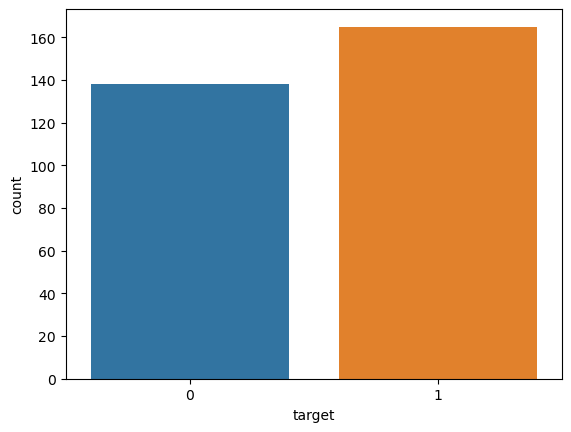

<Figure size 960x720 with 0 Axes>

In [21]:
sns.countplot(x='target',data=df)
plt.figure(dpi=150)

In [25]:
print(df['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [37]:
#shows 165 people with presence of heart disease. 
#correlation with target shows 4 positively correllated attributes.

correlation = df.corr()['target'].sort_values()
posiive_correlation = correlation[correlation > 0]
print(posiive_correlation)

restecg    0.137230
slope      0.345877
thalach    0.421741
cp         0.433798
target     1.000000
Name: target, dtype: float64


In [42]:
# explore ['age','trestbps', 'chol','thalach','target'] columns for sake of practice

new_df = df[['age','trestbps', 'chol','thalach','target']].copy()

In [43]:
new_df.head()

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


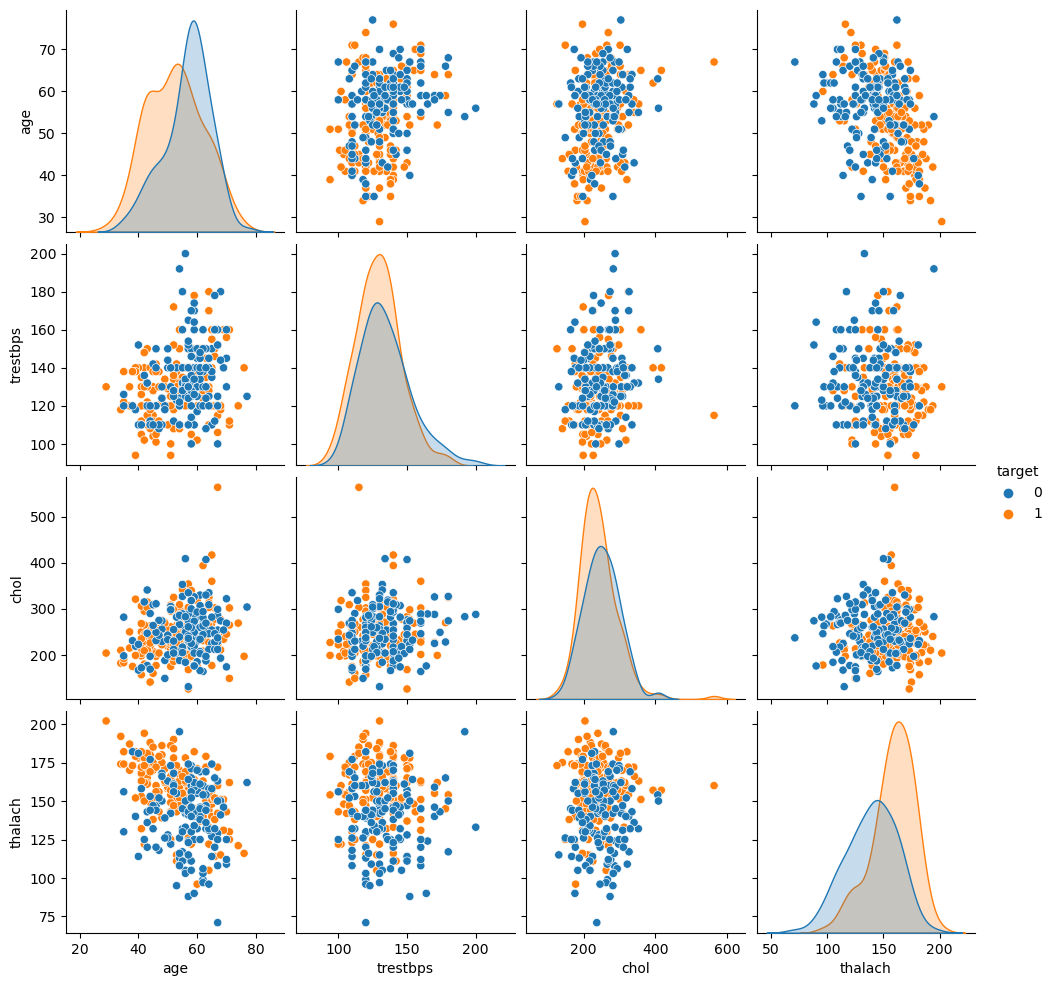

In [45]:
sns.pairplot(data=new_df,hue='target')
plt.show()

In [61]:
#exploring the positively correlated attributes

pos_column_labels = posiive_correlation.index.to_list()
print(pos_column_labels)

['restecg', 'slope', 'thalach', 'cp', 'target']


In [57]:
positive_df = df[posiive_correlation.index.to_list()]

In [60]:
positive_df.head()

,restecg,slope,thalach,cp,target
0,0,0,150,3,1
1,1,0,187,2,1
2,0,2,172,1,1
3,1,2,178,1,1
4,1,2,163,0,1


In [68]:
#sns.pairplot(data=positive_df,hue='target',kind='reg')
#plt.show()
#plot isnt easy to read even when kind is hist kde or scatter as default

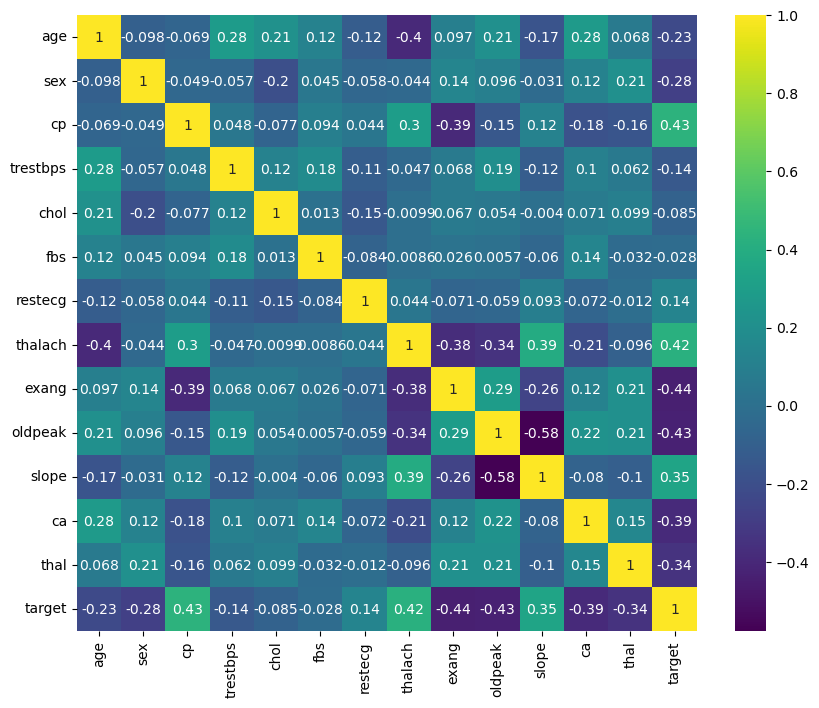

In [74]:
#HEATMAP of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap='viridis') #viridis suitable for people with color vision deficiencies.

plt.show()

# MACHINE LEARNING

## TTS/SCALING

In [75]:
X = df.drop('target',axis=1)

In [76]:
y =df['target']

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [92]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## LOGISTIC REGRESSION MODEL

In [93]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

In [99]:
#Create model
log_model = LogisticRegression()



`'penalty'`: This hyperparameter controls the type of regularization applied to the logistic regression model. It can take two values:

`'l1'`: L1 regularization, also known as Lasso regularization, adds the absolute value of the coefficients to the cost function. It encourages sparsity in the coefficients.

`'l2'`: L2 regularization, also known as Ridge regularization, adds the squared value of the coefficients to the cost function. It discourages large coefficients.

`'C'`: This hyperparameter is the inverse of the regularization strength. It influences the amount of regularization applied to the model. Smaller values of C result in stronger regularization, while larger values result in weaker regularization. The C values in the list [0.001, 0.01, 0.1, 1, 10, 100] cover a range of regularization strengths.

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

another method

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_model = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy')



In [171]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})


In [172]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Pyrex_000\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [108]:
print("Best Parameters:", grid_model.best_params_)
print("Best Score:", grid_model.best_score_)

Best Parameters: {'C': 2.7825594022071245, 'penalty': 'l2'}
Best Score: 0.831043771043771


Asking ChatGPT to explain:

If the best parameter value for `'penalty'` is `'l2'` after performing hyperparameter tuning with `GridSearchCV`, it means that the algorithm found that L2 regularization (Ridge regularization) worked better for your specific problem compared to L1 regularization (Lasso regularization).

Here's a bit more detail about what this choice implies:

**L2 Regularization (Ridge):** In L2 regularization, the penalty term added to the cost function is the sum of the squares of the coefficients (weights) of the features. This encourages the model to have smaller coefficients by penalizing large coefficients. It helps prevent overfitting and can lead to smoother coefficient values.

L2 regularization is often suitable when you believe that most of the features are relevant but that their impact should be limited to avoid overemphasis on any particular feature. It can lead to a more stable and robust model.

**L1 Regularization (Lasso):** In L1 regularization, the penalty term added to the cost function is the sum of the absolute values of the coefficients. L1 regularization encourages sparsity in the coefficients, meaning that some coefficients can become exactly zero, effectively leading to feature selection.

L1 regularization is often suitable when you suspect that many features might be irrelevant or redundant, and you want the model to automatically select a subset of the most important features.

Choosing `'l2'` as the best parameter for the `'penalty'` hyperparameter suggests that the algorithm found that adding squared coefficients to the cost function (L2 regularization) helped improve the overall performance of the model compared to using absolute values of coefficients (L1 regularization).

Keep in mind that the choice of regularization can depend on the characteristics of your data, the number of features, and the complexity of your model. It's often a good practice to try both regularization methods and see which one works better for your specific problem.

In [168]:
grid_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None,
 'param_grid': {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
         5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
         3.59381366e+03, 1.00000000e+04]),
  'penalty': ['l1', 'l2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [189]:
best_model = grid_model.best_estimator_
coef = best_model.coef_

In [190]:
print(coef)

[[-0.06862347 -0.76677567  0.92401506 -0.27433714 -0.22673577  0.04684481
   0.12315594  0.44657231 -0.43416162 -0.53866102  0.39453632 -0.88123288
  -0.58989011]]


#need feature names
feature_names = df.columns.to_list()
print(feature_names)

In [192]:
coefs = pd.Series(index=X.columns,data=best_model.coef_[0])

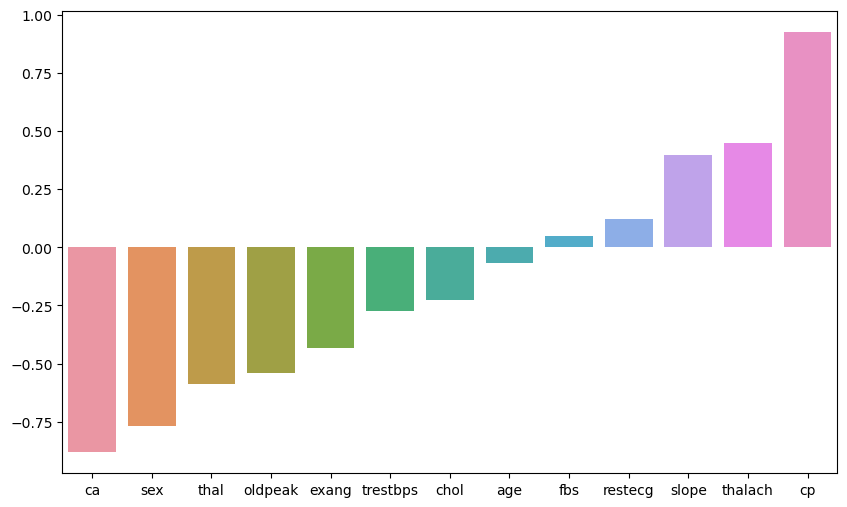

In [193]:
coefs = coefs.sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);